# Data visualization

In this session we'll cover three main topics:
1. How to control graphical elements of a visualization using `matplotlib`
2. How to draw specific type of visualization using `matplotlib` and `seaborn`
3. Good practices for visualizing data

Topic 1 is the most boring so we start with it using a simple line plot as an example, then move to other types of visualization. Suggestions to build effective visualizations will be given throughout the notebook but we'll recap at the end.

# Line plots

Line plots are great visualization tools to show the relation between two variables when there is a dependence between data points (this is what the line emphasizes: it connects points that are dependend on one another, which is what happens, for example, in a time series).

They are also the choice when you are representing a function of one continuous variable. 

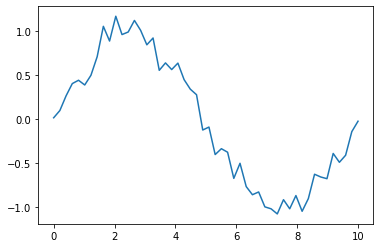

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cortical_networks as cn

time, ts = cn.make_syn_data(n=50, model='sine', f=.1)
plt.plot(time, ts)

As you can see `plt.plot` returns a line object, which contains a lot of information and allows us to manipulate our figure, so we can assign it to a variable to use it later or we can suppress the output as we have seen in previous session.

In [6]:
line = plt.plot(time, ts)

## line properties, markers

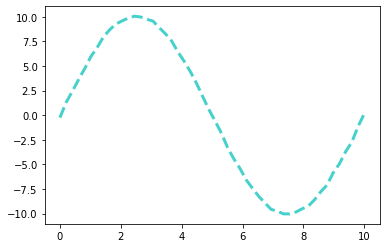

In [36]:
line = plt.plot(time, ts, linewidth=3, color='mediumturquoise', linestyle='--')

In [4]:
line_params = dict(linewidth=3, color='mediumturquoise', linestyle='',
                   marker='d', markersize=7, markerfacecolor='white', markeredgewidth=2)
line = plt.plot(time, ts, **line_params)

## limits, ticks, labels, title, spines

([<matplotlib.axis.XTick at 0x7fcc3f377110>,
 <a list of 3 Text xticklabel objects>)

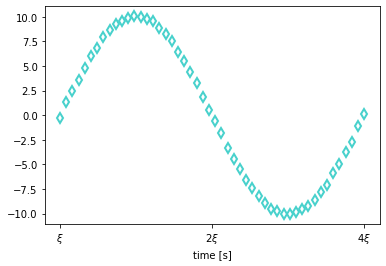

In [62]:
line = plt.plot(time, ts, **line_params)
plt.xlabel('time [s]')
plt.xticks([0, 5, 10], [r'$\xi$', r'2$\xi$', r'4$\xi$'])

In `matplotlib` many things can be achieved through functions (like `xticks`, `plot`, etc.) but to get the finest control over your visualization you'll need to use object properties. In general what you can do with functions can be done with the corresponding method of the right object. You can think of matplotlib visualizations as hierarchical constructs like trees with branches, sub-branches and leaves. It's actually quite simple when you get used to it: the root of the visualization is the figure, the figure contains axes, which are the spaces where we can plot lines, markers, etc. This is enough for now. You can create a figure and axes with the `plt.subplot()` function. You can also mix functions and objects in the code for a visualization (although it's better to keep the mixing at a minimum).

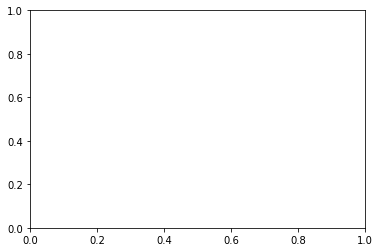

In [72]:
fig, ax = plt.subplots()

Of course there's nothing in it. Now we can use the methods of the axes object to achive the same result as before (methods to set properties of the axes usually begin with `set_`). 

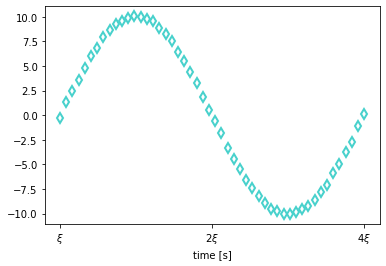

In [84]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_xticks([0, 5, 10])
ax.set_xticklabels([r'$\xi$', r'2$\xi$', r'4$\xi$']);

(0, 6)

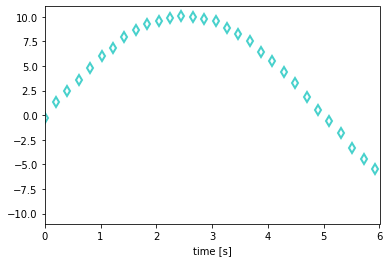

In [85]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_xlim([0, 6]);

Sometimes it's useful (in complex figures) to know the limits at some point in order to restore them later (this might be needed when some object added to the visualization changes the limits and we don't want it). 

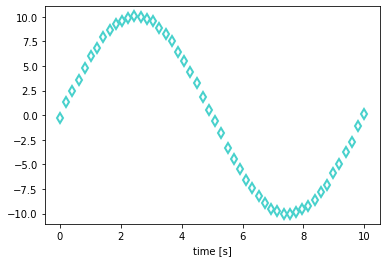

In [86]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
orig_xlims = ax.get_xlim()
ax.set_xlim([0, 6])
ax.set_xlim(orig_xlims);

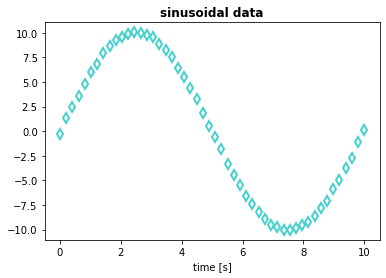

In [87]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold');

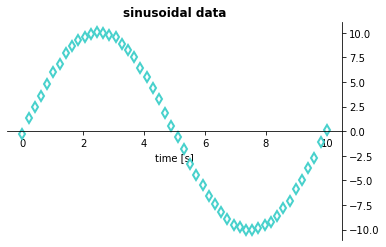

In [104]:
fig, ax = plt.subplots()
line = plt.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('right')
ax.spines['left'].set_position(('data', 10.5))

Sometimes you might just want to get the data without any reference point (ok, this one is really weird but you never know).

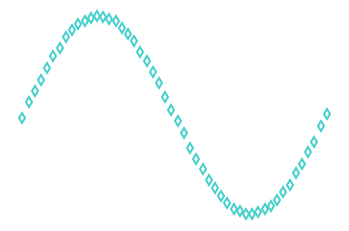

In [103]:
fig, ax = plt.subplots()
line = plt.plot(time, ts, **line_params)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([]);

# interactive figures

Setting axes limits is a good way of zooming and moving inside a plot especially if you want to save the figure for publishing but when you are exploring your data you may want to navigate in a more interactive way.

For this the matplotlib notebook mode comes in handy.

<IPython.core.display.Javascript object>


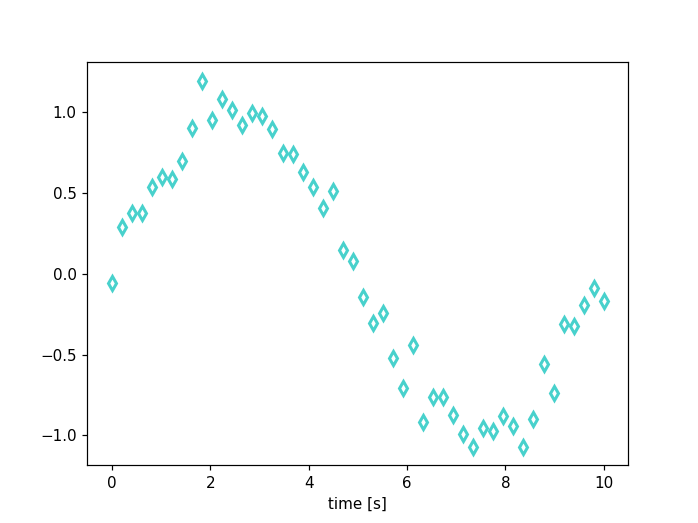

Text(0.5, 0, 'time [s]')

In [8]:
%matplotlib notebook

fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')

You now zoom in and move inside your axes, go back to previous views or to the original view and even save the figure (however we'll see below how to save figures better controlling several parameters).

If you want to go back to the default mode you can run this:

In [9]:
%matplotlib inline

The automatic rendering of figures in notebooks is a very nice feature. Sometimes if you look for examples on the internet you'll find a `plt.show()` issued at the end. This function is only necessary in scripts (you can leave it out in notebooks).

## legend

Let's plot two lines with different frequencies and also a reference line at the 0 on y-axis.

We now want to know which line is which. So we add a legend.

As you will see `matplotlib` tries its best to place the legend in a place where it doesn't interfere with the visualization but sometimes you just want the legend to be in another place. For this you can use the `loc` parameter possibly together with the `bbox_to_anchor` parameter. The `loc` parameters locates the legend in the given position of a bounding box (which by default is the axes). The `bbox_to_anchor` defines that bounding box to anchor the legend arbitrarily using the tuple `(x, y, width, height)`, where `(0, 0, 1, 1)` is the whole axes. So you can place the legend wherever you wish.

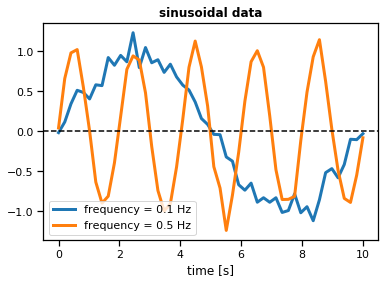

In [6]:
low_freq = 0.1
high_freq = 0.5
time, ts_lowfr = cn.make_syn_data(n=50, model='sine', f=low_freq)
time, ts_highfr = cn.make_syn_data(n=50, model='sine', f=high_freq)
fig, ax = plt.subplots()
line1 = ax.plot(time, ts_lowfr, linewidth=3, label='frequency = {:.1f} Hz'.format(low_freq))
line2 = ax.plot(time, ts_highfr, linewidth=3, label='frequency = {:.1f} Hz'.format(high_freq))
ref_line = ax.axhline(0, c='black', ls='--')
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold')
ax.legend();
#ax.legend(loc='lower left', bbox_to_anchor=(1, .5, .5, .5));

## annotations

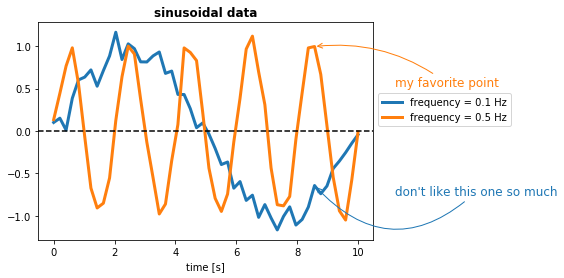

In [132]:
fig, ax = plt.subplots()
line1 = ax.plot(time, ts_lowfr, linewidth=3, label='frequency = {:.1f} Hz'.format(low_freq))
line2 = ax.plot(time, ts_highfr, linewidth=3, label='frequency = {:.1f} Hz'.format(high_freq))
xlims = ax.get_xlim()
ref_line = ax.axhline(0, c='black', ls='--')
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold')
ax.legend(loc='lower left', bbox_to_anchor=(1, .5, .5, .5))
ax.annotate('my favorite point', xy=(time[42], ts_highfr[42]),
             xycoords='data', xytext=(+80, -40), textcoords='offset points',
             fontsize=12, color=line2[0].get_color(), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2", color=line2[0].get_color()))
ax.annotate("don't like this one so much", xy=(time[42], ts_lowfr[42]),
             xycoords='data', xytext=(+80, -10), textcoords='offset points',
             fontsize=12, color=line1[0].get_color(), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5", color=line1[0].get_color()));


# Figures, subplots, axes

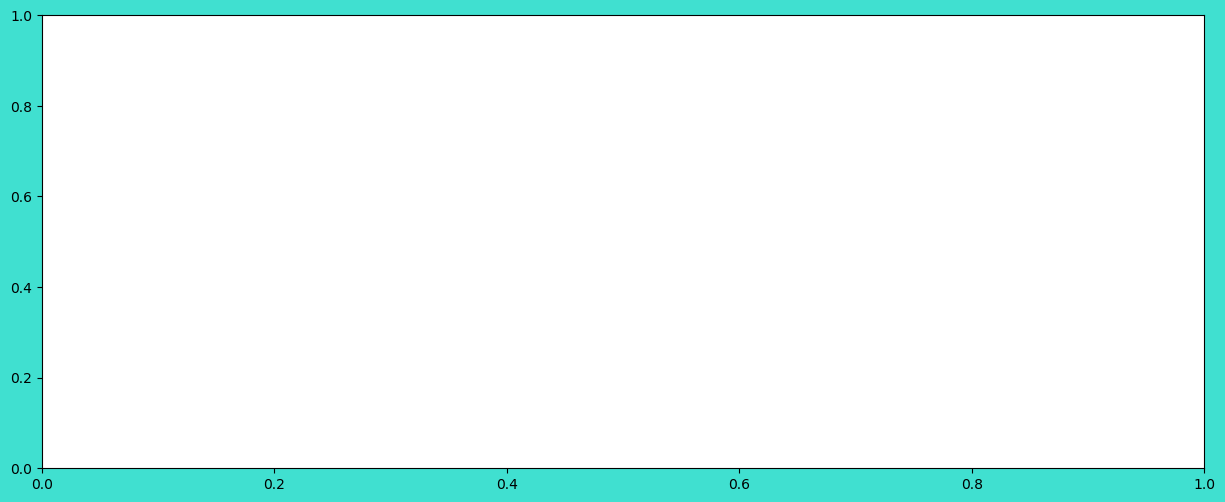

In [177]:
fig, ax = plt.subplots(figsize=[15, 6], dpi=100, facecolor='turquoise')

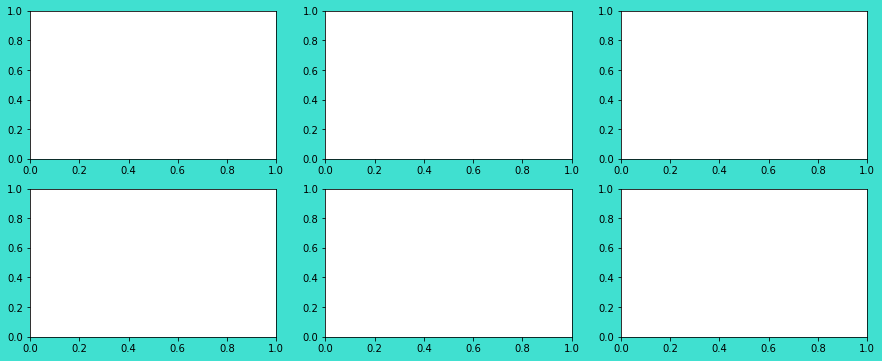

In [179]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[15, 6], facecolor='turquoise')

## link axis

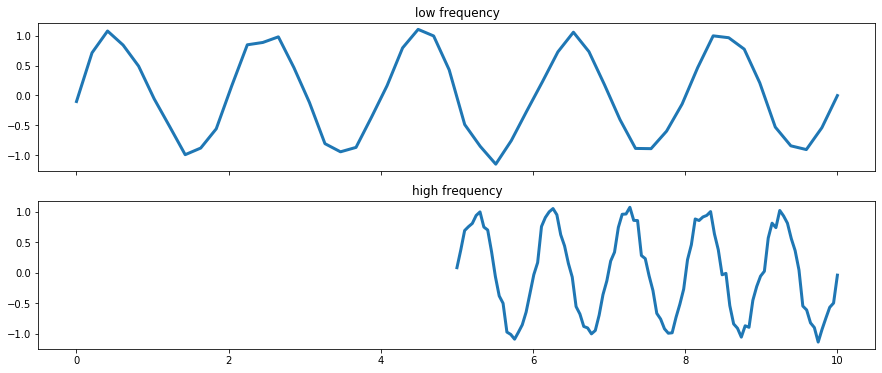

In [134]:
time_s, ts_short = cn.make_syn_data(n=100, model='sine', f=1, xlow=5)
fig, axs = plt.subplots(nrows=2, figsize=[15, 6], sharex=True)
axs[0].plot(time, ts_highfr, lw=3)
axs[1].plot(time_s, ts_short, lw=3)
axs[0].set_title('low frequency')
axs[1].set_title('high frequency');

## double axis

A double axis is useful when you want to show data that "live in the same space", for example are sampled in the same time period but are totally different quantities with different scales. In this case a second axes can be created that shares the bounding box with a preexisting axes and either the x or y axis.

For the sake of the example let's create another series of data with a different amplitude.

The main line to get the double axis here is just `ax2 = ax.twinx()`. The rest of the code is just to get a nicer correspondence of color between data and axis.

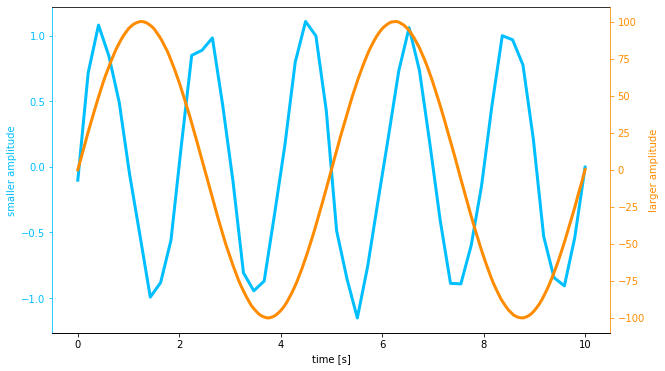

In [135]:
time_new, ts_new = cn.make_syn_data(n=200, model='sine', f=.2, a=100)

fig, ax = plt.subplots( figsize=[10, 6], sharex=True)
line1 = ax.plot(time, ts_highfr, lw=3, color='deepskyblue')
ax.set_xlabel('time [s]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

line2 = ax2.plot(time_new, ts_new, lw=3, color='darkorange')
ax2_col = line2[0].get_color()
ax2.set_ylabel('larger amplitude', color=ax2_col)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=ax2_col, color=ax2_col)
ax_col = line1[0].get_color()
ax.set_ylabel('smaller amplitude', color=ax_col)  # we already handled the x-label with ax1
ax.tick_params(axis='y', labelcolor=ax_col, color=ax_col)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.spines['left'].set_color(ax_col)
ax2.spines['right'].set_color(ax2_col)

## insets and fancy axes

You might want a smaller axes overlaying a larger one to plot a different view of the data, so called inset axes. This is typically used when there's interesting features of the data at two different scales and you want to show both. So the inset shows a zoomed in portion of the larger axes.

For this case the `inset_axes` method is very useful.

Let's first create a composite time series with two frequencies (the inset will show the higher frequency not clearly visible at the larger scale).

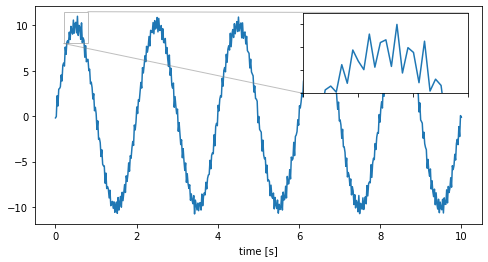

In [136]:
time, signal0 = cn.make_syn_data(n=500, model='sine', f=.5, a=10, b=0.2)
_, signal1 = cn.make_syn_data(n=500, model='sine', f=30, a=.8, b=0)
ts_comp = signal0 + signal1

fig, ax = plt.subplots(figsize=[8, 4])
ax.plot(time, ts_comp)
ax.set_xlabel('time [s]')

# inset axes....
axins = ax.inset_axes([0.6, 0.6, 0.37, 0.37])
axins.plot(time, ts_comp)
# sub region of the original image
x1, x2, y1, y2 = .2, .8, 8, 11.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins);

Sometimes you might want to show a view of the data in the inset that is actually not a zoom-in. You can still use `inset_axes` but in order to show the portion of the larger axes the inset refers to you want to use `indicate_inset` method instead of `indicate_inset_zoom`.

To illustrate this let's say we want to show the histogram of values for different regions of the data.

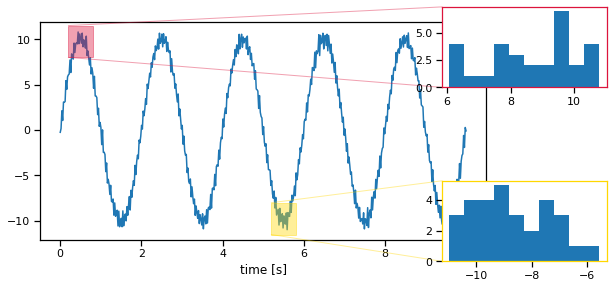

In [136]:
time, signal0 = cn.make_syn_data(n=500, model='sine', f=.5, a=10, b=0.2)
_, signal1 = cn.make_syn_data(n=500, model='sine', f=30, a=.8, b=0)
ts_comp = signal0 + signal1

fig, ax = plt.subplots(figsize=[8, 4])
ax.plot(time, ts_comp)
ax.set_xlabel('time [s]')

# inset axes....
axins = ax.inset_axes([.9, 0.7, 0.37, 0.37])
# create a mask to compute histogram for a subset of the data
mask = np.logical_and(time>=.2, time<.8)
axins.hist(ts_comp[mask])
# the Bbox we are using here comes from the subset of data used (with some arbitrariety on the y-axis) 
rect, connect = ax.indicate_inset([.2, 8, .6, 3.5], inset_ax=axins, transform=ax.transData,
                                  facecolor='crimson', edgecolor='crimson', alpha=0.4)
# change the color of spines to match that of indication
for key, spines in axins.spines.items():
    spines.set_color('crimson')
    
# inset axes....
axins2 = ax.inset_axes([.9, -0.1, 0.37, 0.37])
mask2 = np.logical_and(time>=5.2, time<5.8) 
axins2.hist(ts_comp[mask2])
rect, connect = ax.indicate_inset([5.2, -11.5, .6, 3.5], inset_ax=axins2, transform=ax.transData,
                                  facecolor='gold', edgecolor='gold', alpha=0.4)
for key, spines in axins2.spines.items():
    spines.set_color('gold')

As you can imaging this type of visualization can get quite messy very soon. It is in general suggested not to use too many insets and when they overlap too much with data to put them outside of the parent axes (or with few overlap as in the example above). Anyway with `inset_axes` you have a powerful tool to go anywhere from a classical inset to a separate (but easily linkable) subplot.

The last case where you might want to place axes in the figure at your will is a fancy one (although quite common in scientific papers). When there are data changing in three dimensions (typically video or sequence of images) and we don't want the reader to understand something about each element but just to get the idea of this sequence it's quite usual to have many overlapping axes (for example to show visual stimuli in an experiment).
Let's make an example with an random image downloaded from the internet.

In [114]:
import urllib.request
_ = urllib.request.urlretrieve('http://sanchez-vives.org/assets/img/people/labPeople-all.jpg', "labPeople-all.jpg")
image = plt.imread("labPeople-all.jpg")

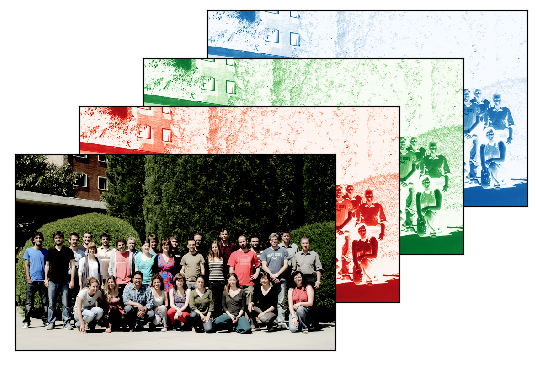

In [170]:
plt.axes([0.4,0.4,.5,.5])
plt.xticks([]), plt.yticks([])
plt.imshow(image[:, :, 2], cmap='Blues')

plt.axes([0.3,0.3,.5,.5])
plt.xticks([]), plt.yticks([])
plt.imshow(image[:, :, 1], cmap='Greens')

plt.axes([0.2,0.2,.5,.5])
plt.xticks([]), plt.yticks([])
plt.imshow(image[:, :, 0], cmap='Reds')

plt.axes([0.1,0.1,.5,.5])
plt.xticks([]), plt.yticks([])
plt.imshow(image);

Modifying the parameters of `axes` you can create you sequence of images with any given space between them to communicate the idea of 3D data.

## subplots grid

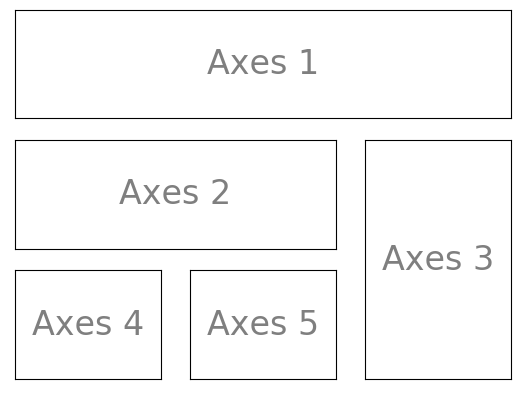

In [188]:
import matplotlib.gridspec as gridspec

G = gridspec.GridSpec(3, 3)

axes_1 = plt.subplot(G[0, :])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 1',ha='center',va='center',size=24,alpha=.5)

axes_2 = plt.subplot(G[1,:-1])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 2',ha='center',va='center',size=24,alpha=.5)

axes_3 = plt.subplot(G[1:, -1])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 3',ha='center',va='center',size=24,alpha=.5)

axes_4 = plt.subplot(G[-1,0])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 4',ha='center',va='center',size=24,alpha=.5)

axes_5 = plt.subplot(G[-1,-2])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 5',ha='center',va='center',size=24,alpha=.5);

Once you have your figure ready you might want to save it to disk. This is readly done with this method (there are a lot of figure formats available).

In [ ]:
fig.savefig('beautiful_figure.png', transparent=False, dpi=80, bbox_inches="tight")

# Drawing with style

As you have seen matplotlib figures are very customizable but it also takes quite some effort to change all parameters to your taste.

Fortunately there are some "styles" defined that alter figures parameters to get a defined look.

Let's try it out.

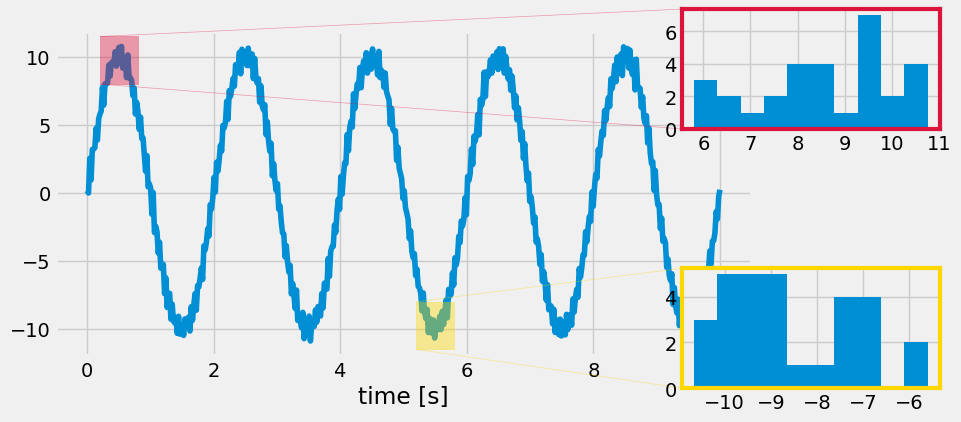

In [217]:
with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots(figsize=[8, 4])
    ax.plot(time, ts_comp)
    ax.set_xlabel('time [s]')

    # inset axes....
    axins = ax.inset_axes([.9, 0.7, 0.37, 0.37])
    # create a mask to compute histogram for a subset of the data
    mask = np.logical_and(time>=.2, time<.8)
    axins.hist(ts_comp[mask])
    # the Bbox we are using here comes from the subset of data used (with some arbitrariety on the y-axis) 
    rect, connect = ax.indicate_inset([.2, 8, .6, 3.5], inset_ax=axins, transform=ax.transData,
                                      facecolor='crimson', edgecolor='crimson', alpha=0.4)
    # change the color of spines to match that of indication
    for key, spines in axins.spines.items():
        spines.set_color('crimson')

    # inset axes....
    axins2 = ax.inset_axes([.9, -0.1, 0.37, 0.37])
    mask2 = np.logical_and(time>=5.2, time<5.8) 
    axins2.hist(ts_comp[mask2])
    rect, connect = ax.indicate_inset([5.2, -11.5, .6, 3.5], inset_ax=axins2, transform=ax.transData,
                                      facecolor='gold', edgecolor='gold', alpha=0.4)
    for key, spines in axins2.spines.items():
        spines.set_color('gold')
    


There are many styles available. You can check them out from this list.

In [144]:
print(plt.style.available)

['dark_background', 'seaborn-darkgrid', 'classic', 'seaborn-ticks', 'ggplot', '_classic_test', 'seaborn-talk', 'seaborn-dark', 'seaborn-bright', 'Solarize_Light2', 'fivethirtyeight', 'seaborn-pastel', 'grayscale', 'seaborn', 'seaborn-dark-palette', 'bmh', 'seaborn-notebook', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-poster', 'seaborn-paper', 'seaborn-muted', 'seaborn-white', 'seaborn-colorblind', 'fast', 'tableau-colorblind10']


The `with` clause in previous code cell sets the style context only for that figure. If you want to apply a style to every figure you can use `plt.style.use('fivethirtyeight')`.

You can even draw figures in the style of [xkcd](https://xkcd.com) comics.

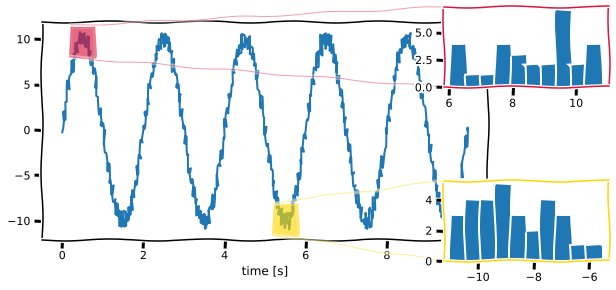

In [142]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=[8, 4])
    ax.plot(time, ts_comp)
    ax.set_xlabel('time [s]')

    # inset axes....
    axins = ax.inset_axes([.9, 0.7, 0.37, 0.37])
    # create a mask to compute histogram for a subset of the data
    mask = np.logical_and(time>=.2, time<.8)
    axins.hist(ts_comp[mask])
    # the Bbox we are using here comes from the subset of data used (with some arbitrariety on the y-axis) 
    rect, connect = ax.indicate_inset([.2, 8, .6, 3.5], inset_ax=axins, transform=ax.transData,
                                      facecolor='crimson', edgecolor='crimson', alpha=0.4)
    # change the color of spines to match that of indication
    for key, spines in axins.spines.items():
        spines.set_color('crimson')

    # inset axes....
    axins2 = ax.inset_axes([.9, -0.1, 0.37, 0.37])
    mask2 = np.logical_and(time>=5.2, time<5.8) 
    axins2.hist(ts_comp[mask2])
    rect, connect = ax.indicate_inset([5.2, -11.5, .6, 3.5], inset_ax=axins2, transform=ax.transData,
                                      facecolor='gold', edgecolor='gold', alpha=0.4)
    for key, spines in axins2.spines.items():
        spines.set_color('gold')

In IPython based environments (like the notebooks) sometimes it might be hard to revert the style to the defauls. However you can always go back to default figure parameters with

In [143]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# seaborn

Seaborn is a library that will make you visualization work easier (and nicer).

It's built on top of matplotlib. This means all you can do with seaborn you can do it with matplotlib but seaborn interface is easier to use (at least if you are familiar with pandas).

Seaborn can also set styles but allows only five styles: *darkgrid*, *whitegrid*, *dark*, *white* and *ticks*.

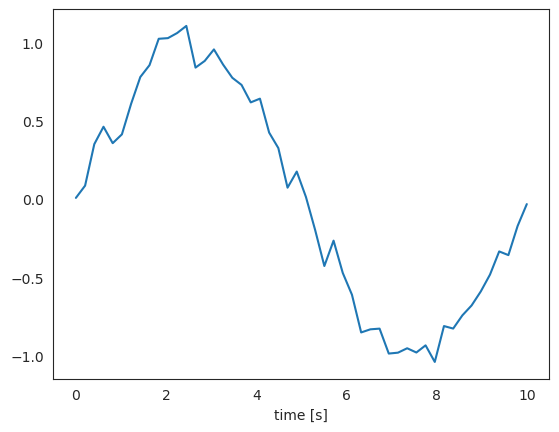

In [144]:
import seaborn as sns

with sns.axes_style('white'):
    time, ts = cn.make_syn_data(n=50, model='sine', f=.1)
    plt.plot(time, ts)
    plt.xlabel('time [s]')

Usually you want the scaling of your text, line widths and other graphical element to change depending on the aim of your visualization.

For this seaborn provides four contexts (from smaller to larger scale): *paper*, *notebook*, *talk*, and *poster*.

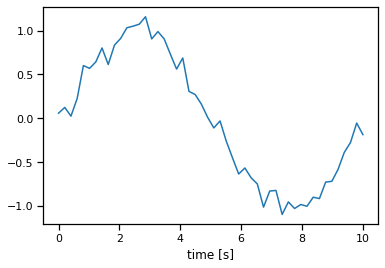

In [4]:
sns.set_context("poster")
time, ts = cn.make_syn_data(n=50, model='sine', f=.1)
plt.plot(time, ts)
plt.xlabel('time [s]');

# seaborn visualization philosophy

`seaborn` approach to visualization comes from data analysis. While you can use seaborn functions with a syntax similar to matplotlib functions its power lays in the interaction with pandas DataFrame objects.

The core idea is that your dataset is stored in a DataFrame as we have seen in the [pandas notebook](pandas.ipynb). Then you pass this DataFrame to the visualization function together with information about which variable to put on each axis.

Let's see an example with the data we have used so far.

We build a 3-columns DataFrame with the time and two synthetics time series.

In [7]:
import pandas as pd

dataset = pd.DataFrame({'time': time, 'ts high frequency': ts_highfr, 'ts low frequency': ts_lowfr})

dataset.head(5)

,time,ts high frequency,ts low frequency
0,0.000000,0.042949,-0.016019
1,0.204082,0.660175,0.116990
2,0.408163,0.980382,0.343358
3,0.612245,1.021826,0.512839
4,0.816327,0.550377,0.485853


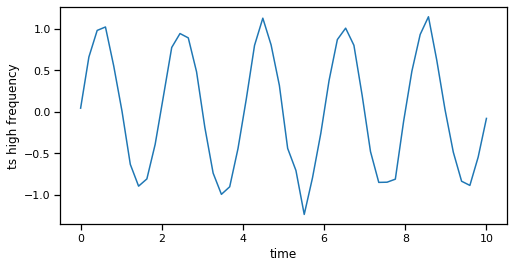

In [8]:
fig, ax = plt.subplots(figsize=[8, 4])
g = sns.lineplot(data=dataset, x="time", y="ts high frequency", ax=ax)

Here we tell seaborn to use the "time" column as x-axis variable and the "ts high frequency" column as y-axis variable and seaborn take care of everything, included axis labels. Under seaborn it's just matplotlib so you can customize everything (maybe you'd like to add units to your x-axis label) but it's nice to have neat approximately good visualizations with few lines of code.

The power of seaborn really shines with complex datasets with multiple variables.

Let's load an fMRI dataset.

In [10]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Here we have four sources of variation in the fMRI data: subjects, time, event and region.

Let's plot the signal as a function of time.

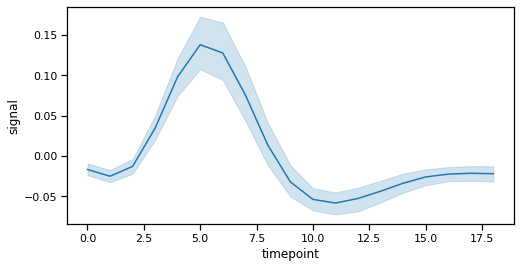

In [11]:
fig, ax = plt.subplots(figsize=[8, 4])
sns.lineplot(data=fmri, x="timepoint", y="signal", ax=ax)

Together with the line plot we also got a shaded area representing uncertainty (or variation). This happens because for each time point we have multiple measurements.

So the line represents an estimation of central tendency and the area a dispersion statistics. Of course we can control which statistics are used.

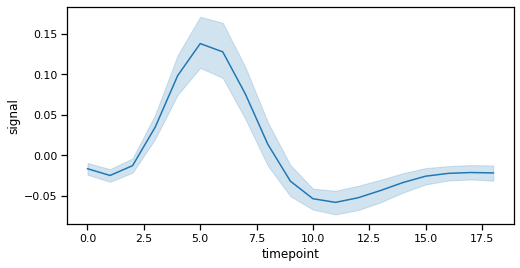

In [24]:
fig, ax = plt.subplots(figsize=[8, 4])
sns.lineplot(data=fmri, x="timepoint", y="signal", ax=ax, estimator=np.mean, ci=95)

Now let's say you want to show two lines: one for parietal and one for frontal region (the only two regions present in the dataset).

`seaborn` treats the color as an additional axis called `hue`, so you just have to specify that you want the variable "region" to be represented on the hue-axis.

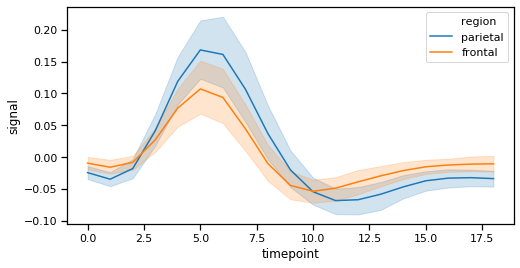

In [26]:
fig, ax = plt.subplots(figsize=[8, 4])
sns.lineplot(data=fmri, x="timepoint", y="signal", ax=ax, estimator=np.mean, ci=95,
            hue="region")

The other "axis" available for line plots are `style` and `size`. We can for example represent both region, event and time variation in the same axes.

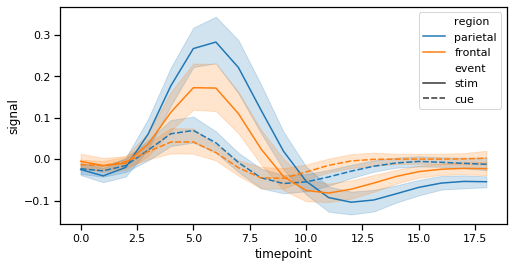

In [27]:
fig, ax = plt.subplots(figsize=[8, 4])
sns.lineplot(data=fmri, x="timepoint", y="signal", ax=ax, estimator=np.mean, ci=95,
            hue="region", style="event")

However it's in general discouraged to draw too many lines in a single axes.

If we want to represent other sources of variability in different subplots the `sns.relplot` functions will make our life easier.

This function allows to represent relations between continuous variables in different formats (including line plots).

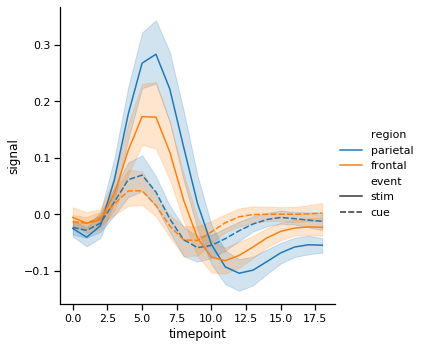

In [29]:
sns.relplot(data=fmri, x="timepoint", y="signal", estimator=np.mean, ci=95,
            hue="region", style="event", kind="line")

The nice feature of `relplot` is that it allows to represent variables on rows or columns of a grid of subplots.

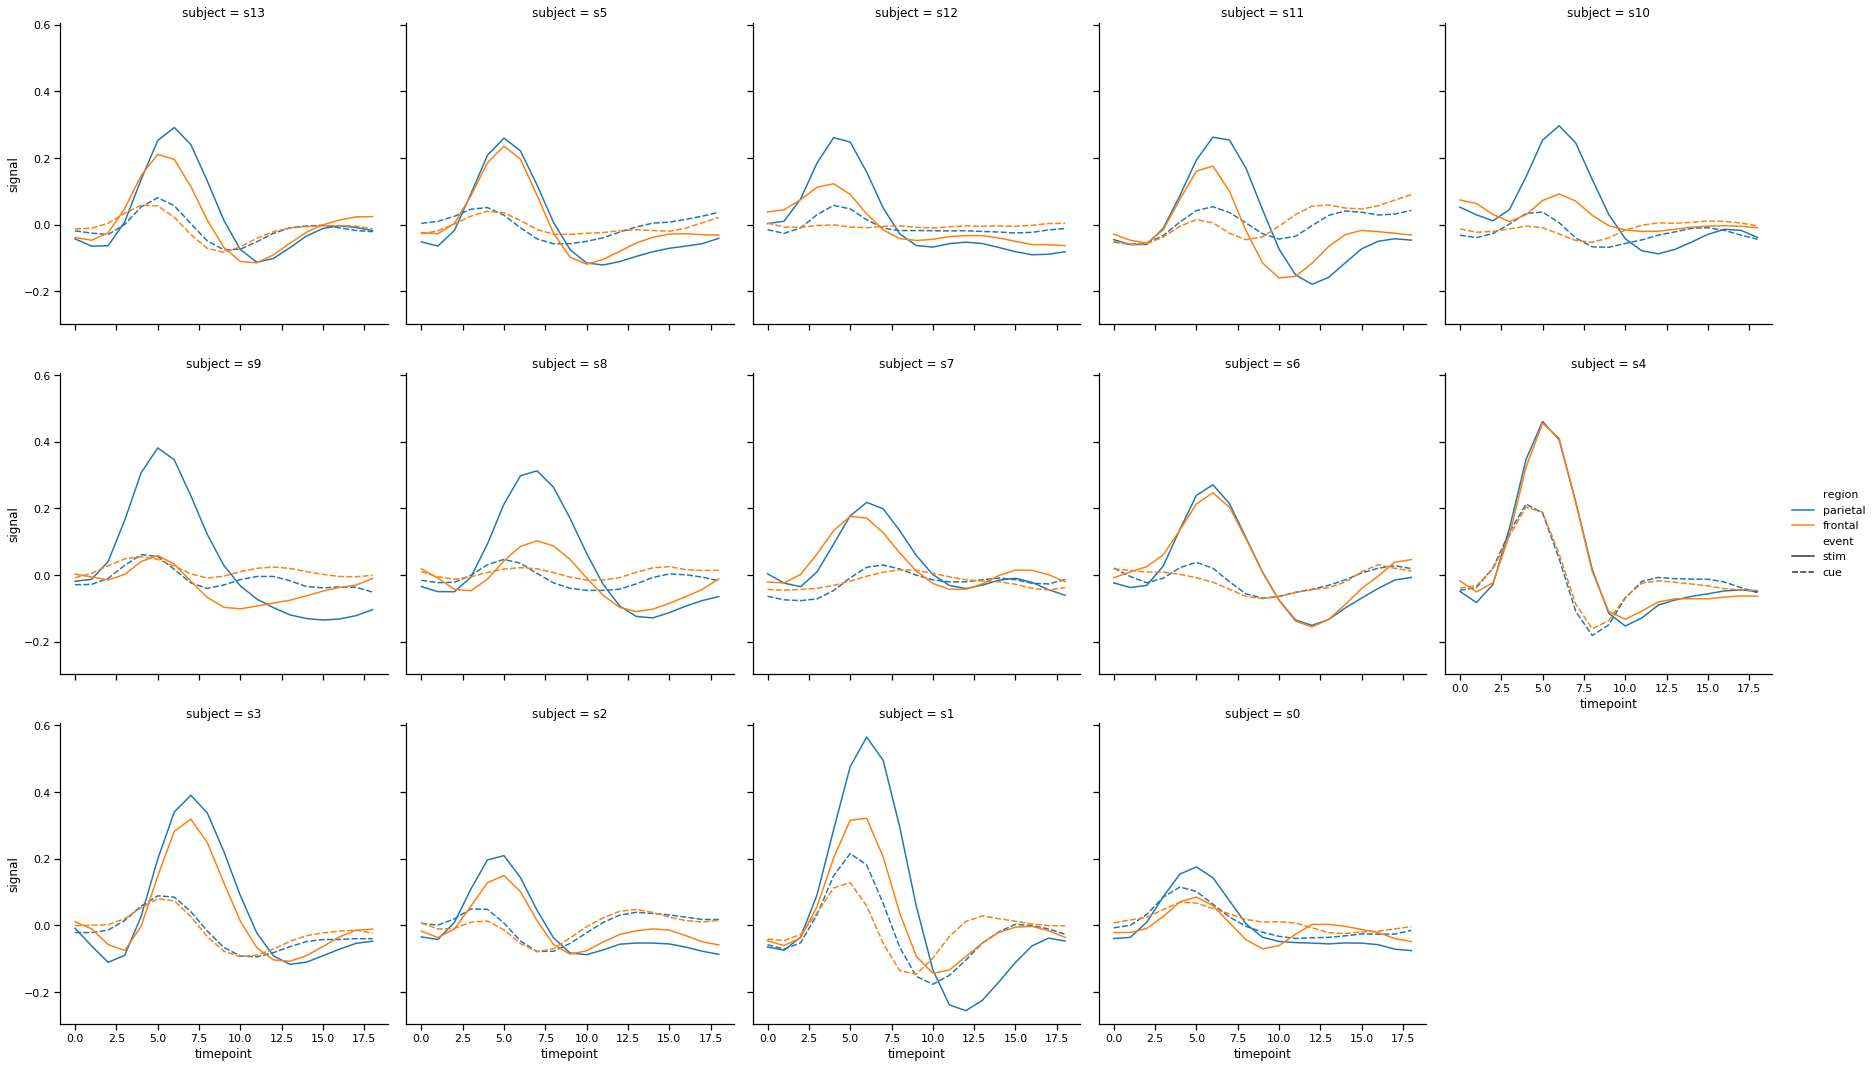

In [31]:
sns.relplot(data=fmri, x="timepoint", y="signal", estimator=np.mean, ci=95,
            hue="region", style="event", kind="line", col="subject", col_wrap=5)

# Scatter plot

The line in line plots emphasizes the dependency relation between neighbouring points.

When there is no (or only weak) dependence between data points (so called i.i.d. data in statistics) a better visualization is a scatter plot, that allows to show the joint distribution of two variables. Actually scatterplots don't show distributions because you don't get explicitly a count or density of samples in a given area (see the [distributions notebook](distributions.ipynb)) but the position of each point. However your eye will more or less easily do a density estimation based on the number of points show in each area. 

Let's use as an example the UP/DOWN dataset we presented in the [pandas notebook](pandas.ipynb).

In [32]:
dataUD = pd.read_csv('Dataframe_UDs.csv', sep=',', skiprows=4)
dataUD.head(5)

,Up_dur,Down_dur,id,level
0,0.5151,2.9733,0,deep
1,0.3621,1.0761,0,deep
2,0.3876,1.6269,0,deep
3,0.3315,0.8517,0,deep
4,0.7038,1.7391,0,deep


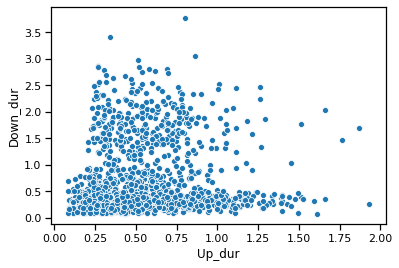

In [50]:
sns.scatterplot(data=dataUD, x="Up_dur", y="Down_dur")

you can use the lower level function `sns.scatterplot` or the higher level function `sns.relplot`.

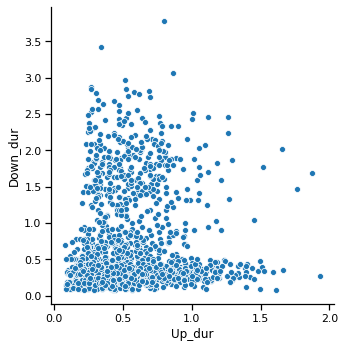

In [53]:
sns.relplot(data=dataUD, x="Up_dur", y="Down_dur", kind='scatter')

As for the line plot we can use `hue`, `size` and `style` to represent additional variables.

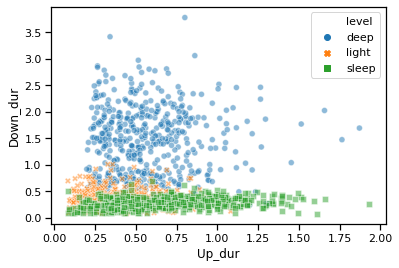

In [52]:
sns.scatterplot(data=dataUD, x="Up_dur", y="Down_dur", hue="level", style="level", alpha=0.5)

Scatter plots are useful to get an immediate visual idea of the relation between variables. If you are interested in visualization of regression models between variables you can have a look at `sns.regplot`. 

# Visualization with discrete variables

Line and scatter plots are good when you have to represent continuous variables.

When our data are grouped by discrete variables (see the [distributions notebook](distributions.ipynb)) it's usually a good idea to reflect this discreteness in discrete graphical elements.

We review here few visualization tools for discrete variables.

## visualizing distributions

We have seen in the [distributions notebook](distributions.ipynb) how to visualize a distribution with histograms.

### KDE

A smoother version of histograms is the kernel density estimation of a distribution (you can read more about it [here](https://en.wikipedia.org/wiki/Kernel_density_estimation) and [here](https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions)).

`seaborn` implements both histograms and KDE in `distplot`.

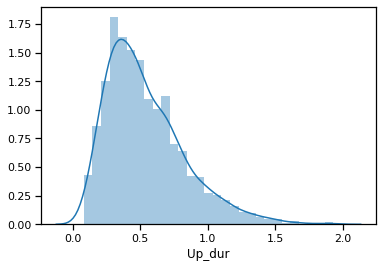

In [35]:
sns.distplot(dataUD.Up_dur)

as you can see the KDE is a smoother version of the histogram and converges faster to the true underlying distribution for continuous variables.

If you have to one or two distributions histograms or KDE are good but if your discrete variable (the one that defines groups in your data) has many levels other visualizations are better.

### Box plot

The most typical is the box plot.

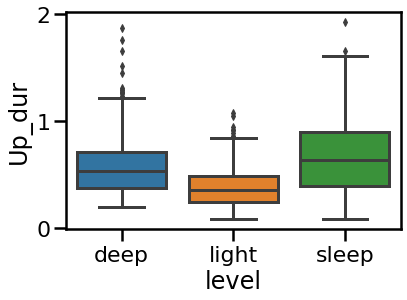

In [90]:
sns.boxplot(x="level", y="Up_dur", data=dataUD)

This visualization shows the median (central line), interquartile range (box limits), range (whiskers) and possible outliers (dots), so, yes this is not really an estimation of the full distribution but just few summary statistics, however they usually characterize quite well a distribution. 

As for continuous variable here we can use the lower level functions (like `sns.boxplot`) or the higher level function `sns.catplot`.

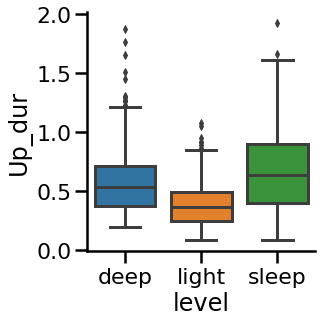

In [108]:
g = sns.catplot(x="level", y="Up_dur", data=dataUD, kind='box')

When your data are grouped by a categorical variable the only additional axis available is `hue` (if you think about it size and style could not apply here).

### Violin plot

Another useful visualization for multiple distributions is the violin plot.

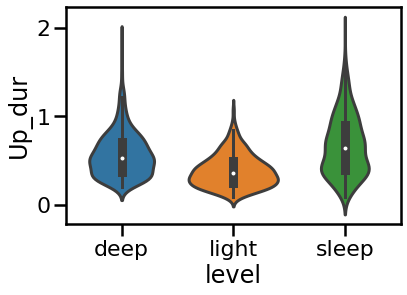

In [95]:
sns.violinplot(x="level", y="Up_dur", data=dataUD)

Here we have a kernel density estimation of the distribution mirrored about the vertical axis with a small box plot in the middle. We can customize a lot this visualization so, please have a look at the documentation. For example we can cut the estimation to the region where data are available (to avoid distributions that go down to negative durations).

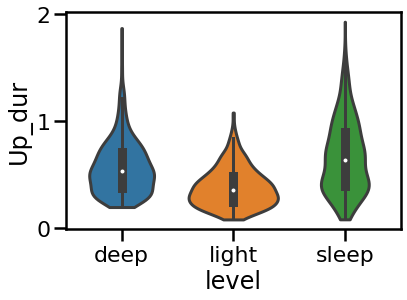

In [106]:
sns.violinplot(x="level", y="Up_dur", data=dataUD, cut=0)

### Individual points: strip plot and swarm plot

Sometimes it's useful to show also individual points as we do in scatter plots. For this we can use `sns.swarmplot` and `sns.stripplot`.

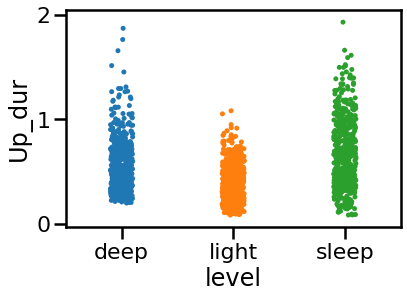

In [133]:
sns.stripplot(x="level", y="Up_dur", data=dataUD)

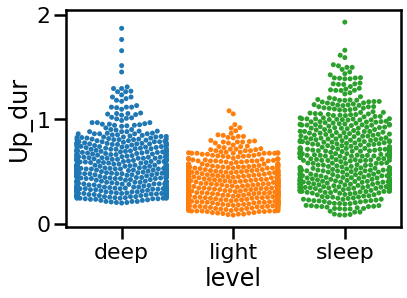

In [118]:
sns.swarmplot(x="level", y="Up_dur", data=dataUD)

You can even combine these dot plots with distributional plots.

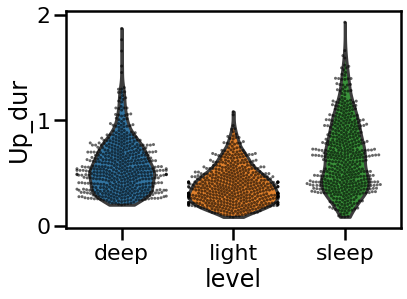

In [124]:
ax = sns.violinplot(x="level", y="Up_dur", data=dataUD, cut=0, inner=None)
sns.swarmplot(x="level", y="Up_dur", data=dataUD, size=3, color='black', alpha=0.6, ax=ax)

## visualizing estimations

### Bar plot for count data

Bar plots are one of the simplest visualization tools and are well suited when you have to represent count data or when you have just one measure for each group (but this is more of an edge case).
In this case you can use `sns.countplot`.

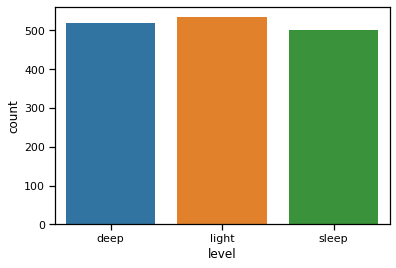

In [45]:
sns.countplot(x="level", data=dataUD)

### Pie charts and stacked bar plots

When your the sum of your count data over the levels of the categorical variable is equal to a constant you may want to use another visualization to emphasize the proportional contribution of each level to the whole.
Typical case is for probabilities that sum to one.

In this case a pie chart is common. This is useful especially if there is another discrete variable so that comparing different pie charts is a visualization goal. 

However humans are not good at estimating the area of pie wedges so, if you also want the single estimates to be easily interpretable a stacked bar chart is a better tool.

### Bar plots for estimates
Another common use of bar graphs is for single estimates within each group.

Typically you may want to compare the mean (or any other central tendency statistics) of different groups. But this could also apply to other statistics (you might compare for example the standard deviation of inter-spike intervals of different neurons).

We separate this case from the count because the estimation of a summary statistics implies an underlying sampling distribution that we are summarizing. Thus we are reducing the complexity of data (the distribution) to focus on a simpler view (the statistics). We have to be very careful in this reduction process, since we could leave out some important details. As a general principle it's better to leave out details only if they can be easily inferred and if the resulting visualization is easier to interpret.
When it comes to estimates of summary statistics a relevant piece of information that is sometimes leave out is the variability of the estimate. It's a good idea to always show the variability of the estimate using an errorbar. 

Seaborn can deal at the same time with estimation and visualization, including the errorbar (interface is very similar to `sns.lineplot`).

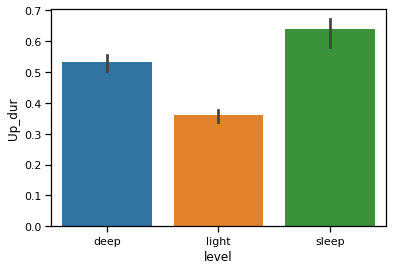

In [46]:
sns.barplot(x="level", y="Up_dur", data=dataUD, estimator=np.median, ci=95)

# heatmap and contour plot

We have seen above that line plots are the natural representation for a function of one variable. When we want to represent a function of two continuous variables these are mapped onto the x- and y-axis and the value of the function is mapped on a third axis. The third axis can be either the z-axis or the color-axis. We don't suggest to use 3D figures as they are difficult to interpret, usually need to be rotated (only possible in interactive environment or movies) and take more time to understand. So, long story short: if you need to represent a function of two continuous variables use the color-axis.

Functions of two variables will in general be represented in data by a 2D array with the value of the function at each (x, y) point on a discrete grid on the space defined by the two argument variables.

## heatmap

A graphical representation of a 2D array or matrix is called a heatmap. Let's see how it works.

Let's first create a function of two variables.

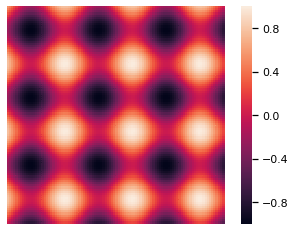

In [81]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
twoDfunc = (np.sin(X) + np.sin(Y)) / 2
ax = sns.heatmap(twoDfunc, square=True, xticklabels=False, yticklabels=False)

## covariance matrix and similar 2D arrays
A common matrix that is represented in scientific work is the covariance matrix or its normalized version, the Pearson's correlation matrix. This matrix does not actually represent a function of two continuous variables but you can still use a heatmap to visualize it.

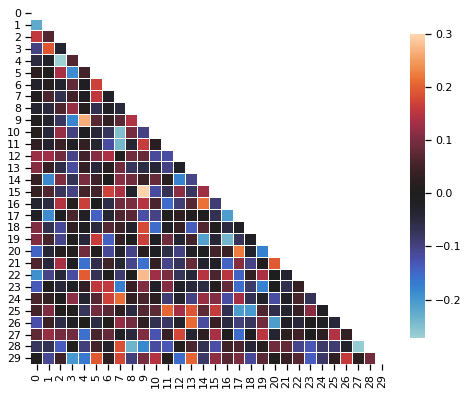

In [111]:
fig, ax = plt.subplots(figsize=[8, 8])
rnd_data = np.random.randn(100, 30)
corr_matrix = np.corrcoef(rnd_data, rowvar=False)
mask = np.triu(corr_matrix, k=0)
sns.heatmap(corr_matrix, square=True, linewidths=.01, mask=mask, vmax=.3, center=0, ax=ax, cbar_kws={"shrink": .7})

As you can see you can also apply a mask if you want to hide some entries of the array and you can control many other features via additional parameters.

The `matplotlib` function to visualize a 2D array is called `imshow`. You have already seen this function above to show an image (indeed an image is just a 2D array).

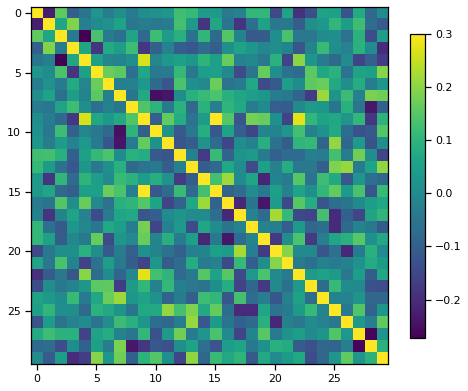

In [120]:
fig, ax = plt.subplots(figsize=[8, 8])
corr_matrix = np.corrcoef(rnd_data, rowvar=False)
art = ax.imshow(corr_matrix, vmax=.3)
plt.colorbar(art,  shrink=.7)

## contour map

When you have a function of two continuous variables another possible visualization is the so called contour map, where in the (x, y) plane lines are shown that connect points with equal value of the function (typical examples are isobar maps that represent points with the same pressure for use in weather analysis or topographic maps where lines connect points with equal elevation).

You can create a contour map with `matplotlib`.

<a list of 58 text.Text objects>

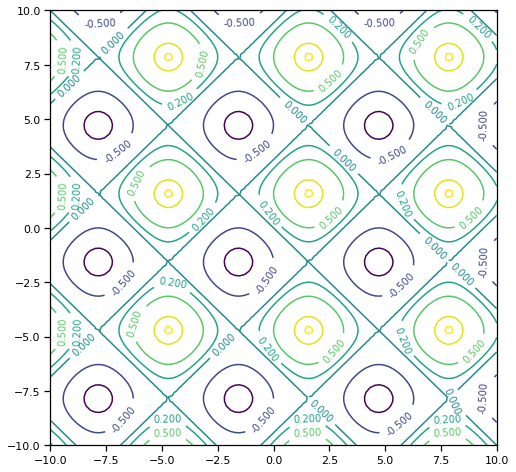

In [129]:
fig, ax = plt.subplots(figsize=[8, 8])
cont = ax.contour(X, Y, twoDfunc, levels=[-.9, -.5, 0, .2, .5, .9, .99])
ax.clabel(cont, inline=True, fontsize=10)

You can also draw filled contour plots.

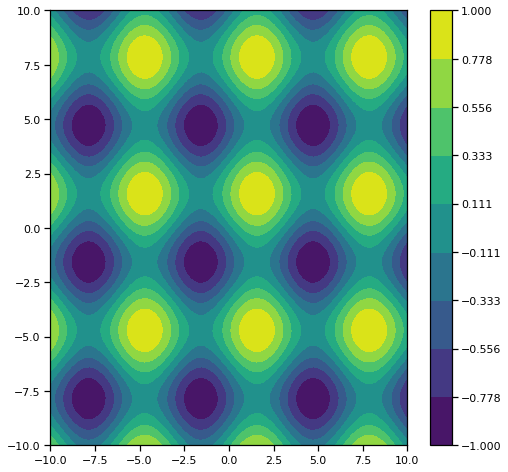

In [132]:
fig, ax = plt.subplots(figsize=[8, 8])
cont = ax.contourf(X, Y, twoDfunc, levels=np.linspace(-1, 1, 10))
plt.colorbar(cont)

# Summary of good viz practices

0. Identify all sources of variability in your data (these will correspond to variables you have recorded).

## which plot

### when to draw a line

## which color